In [12]:
import pandas as pd
import numpy as np
!pip install wordcloud
import matplotlib.pyplot as plt

In [13]:
from wordcloud import WordCloud,STOPWORDS

In [5]:
reviews = pd.read_csv('C:/Users/Chithsabesh/Downloads/yelp/total_reviews.csv')

In [6]:
reviews.head()

,Unnamed: 0,business_id,review_id,user_id,stars,date,text,useful,funny,cool
0,0,fweCYi8FmbJXHCqLnwuk8w,iIDjTM9pXwF8Txfrj4ZY1Q,4Nl9USkee-GdfTaxbUZN-Q,1,2012-12-01,This place is b.s. They sent me a $10 gift cer...,0.0,0.0,0.0
1,1,fweCYi8FmbJXHCqLnwuk8w,ox8-CGTo3ewUWMdIHJIGTQ,bDnaX6jPdunz3GK63n3T8Q,5,2016-12-01,Service was great and food is truly incredible...,0.0,0.0,0.0
2,2,fweCYi8FmbJXHCqLnwuk8w,IJLOaDstp_auq9f8umDrFw,IaQP0fMvvSzu8AnCo2Jc_Q,4,2017-08-27,I live just down the street from here and this...,0.0,0.0,0.0
3,3,bJP4l_BGq2CudEu0m-wNjg,DBuztxZlkLdvrRLmUztB-w,e5n-s1OhaqXP9siQ6dNm0A,4,2009-04-26,"Food was great, service was great. Be sure to ...",2.0,1.0,1.0
4,4,WlArCYe6xCzOe5u2Lt1how,RapHw_w9tuGF3jrIRn186A,Wc8GmrK-7J4Ncliwr06j7A,5,2010-06-20,Always fresh and hot and fast. Great customer ...,1.0,0.0,1.0


In [7]:
reviews.loc[0, 'text']

'This place is b.s. They sent me a $10 gift certificate welcoming me to the area, but when I went to use it, they wouldn\'t honor it with their so called "special" and charged me 3.00 more then I was told. Really?!?! I also ordered it for pickup, they said 20 minutes I had an errand to run first and got there 30 minutes later and still had to wait 5-7 minutes for it to be ready. This is one new customer they won\'t be getting back!'

In [8]:
reviews.loc[1, 'text']

'Service was great and food is truly incredible. Joe and his team are not only consistent, but they really make sure everything is perfect. Would recommend this place in a heartbeat!'

In [9]:
reviews['stars'].describe()

count    290262.000000
mean          3.704601
std           1.402295
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [10]:
star_counts = reviews['stars'].value_counts()

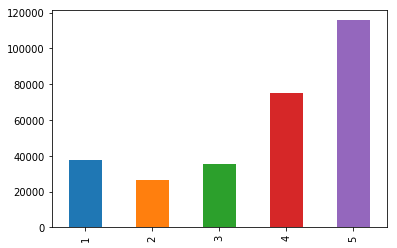

In [14]:
# task: create a bar plot of number of reviews for each star rating
# hint: sort_index may be useful to get your x-axis in the most intuitive order
star_counts.sort_index().plot(kind='bar')

In [29]:
# task, filter the 'text' column using the 'stars' column to create Series of good and bad review text
# call the results good_review_text and bad_review_text, respectively
# two lines of code here:
good_review = reviews[['text','stars']]

In [30]:
good_review.head()

,text,stars
0,This place is b.s. They sent me a $10 gift cer...,1
1,Service was great and food is truly incredible...,5
2,I live just down the street from here and this...,4
3,"Food was great, service was great. Be sure to ...",4
4,Always fresh and hot and fast. Great customer ...,5


In [31]:
good_review.shape

(290262, 2)

In [65]:
bad_review_text = good_review.query('stars==1 | stars==2')

In [66]:
bad_review_text.shape

(64132, 2)

In [67]:
bad_review_text.head()

,text,stars
0,This place is b.s. They sent me a $10 gift cer...,1
7,Huge disappointment. Seriously confused by th...,2
10,I don't know what is happening to Oregano's. I...,1
12,"First off this breaks my heart, but I'm finall...",1
17,This place is so overrated . We ate at the one...,1


In [68]:
good_review_text = good_review.query('stars==4 | stars==5')

In [69]:
good_review_text.shape

(190617, 2)

In [70]:
# task: select the first 1000 items in each of the good and bad review text Series and chain the
# str.lower() method to convert characters to lower case. Save the results back in place.
# two lines of code here
good_review_text = good_review_text['text'].str.lower().head(1000)

In [71]:
bad_review_text = bad_review_text['text'].str.lower().head(1000)

In [77]:
good_review_text.head()


1    service was great and food is truly incredible...
2    i live just down the street from here and this...
3    food was great, service was great. be sure to ...
4    always fresh and hot and fast. great customer ...
5    we tried davidson pizza company as we really e...
Name: text, dtype: object

In [73]:
bad_review_text.head()

0     this place is b.s. they sent me a $10 gift cer...
7     huge disappointment.  seriously confused by th...
10    i don't know what is happening to oregano's. i...
12    first off this breaks my heart, but i'm finall...
17    this place is so overrated . we ate at the one...
Name: text, dtype: object

In [78]:
good_text = ' '.join(good_review_text)

In [79]:
bad_text = ' '.join(bad_review_text)

In [80]:
good_wordcloud = WordCloud(background_color='white',max_words=50).generate(good_text)

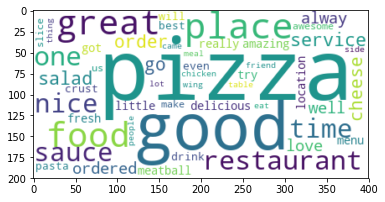

In [81]:
plt.imshow(good_wordcloud, interpolation='bilinear')


In [82]:
bad_wordcloud = WordCloud(background_color='white',max_words=50).generate(bad_text)

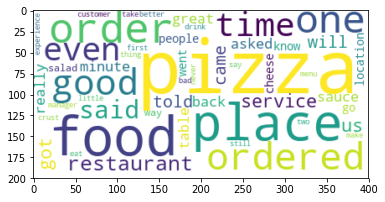

In [83]:
plt.imshow(bad_wordcloud, interpolation='bilinear')

In [84]:
bad_stopwords = set(['pizza', 'food', 'order', 'place'])

In [90]:
# Generate a word cloud image
better_wordcloud = WordCloud(stopwords=bad_stopwords, background_color="white",max_words=50).generate(bad_text)


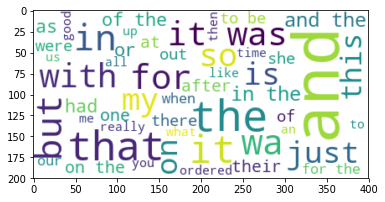

In [91]:
plt.imshow(better_wordcloud, interpolation='bilinear')

In [92]:
better_wordcloud = WordCloud(stopwords=bad_stopwords, background_color="white",max_words=50).generate(good_text)


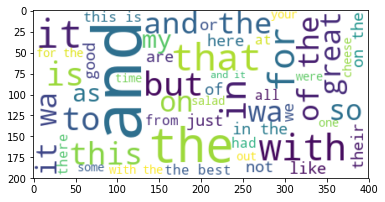

In [93]:
plt.imshow(better_wordcloud, interpolation='bilinear')